## Configuración del Entorno y Librerías

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)

## Carga de Datos

In [2]:
data = pd.read_csv(r'docs\Propensity.csv', delimiter=',')

display(data)

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,F,TIPO3,FUEL 1,Alta,M,Contado,SOLTERO,F,Empresa,...,NaN,SI,Averia muy grave,SI,6832,12528,False,5,38,0
58045,CLI57926,K,TIPO7,FUEL 1,Alta,A,Contado,NaN,NaN,Empresa,...,Medio-Bajo,NO DATA,No,SI,0,22072,False,3,54,0
58046,CLI57952,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,0,8352,False,8,63,0
58047,CLI58038,G,TIPO5,FUEL 2,Media,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,No,NO,2786,10441,False,13,62,0


In [10]:
data.dtypes

CODE               object
PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia           object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona_Renta         object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Mas_1_coche          bool
Revisiones          int64
Edad_Cliente        int64
Tiempo              int64
dtype: object

In [11]:
print(len(data.columns))

24


In [ ]:
# Columnas de tipo object
columnas_interes_object = [
    'CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS', 
    'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 
]

for col in columnas_interes_object:
    print(f"-> {col}: {data[col].unique()}")
    


-> CODE: ['CLI1' 'CLI2' 'CLI3' ... 'CLI57952' 'CLI58038' 'CLI58048']
-> PRODUCTO: ['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']
-> TIPO_CARROCERIA: ['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']
-> COMBUSTIBLE: ['FUEL 1' 'FUEL 2']
-> Potencia: ['Baja' 'Media' 'Alta']
-> TRANS: ['M' 'A']
-> FORMA_PAGO: ['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']
-> ESTADO_CIVIL: ['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA' nan]
-> GENERO: ['M' 'F' nan]
-> OcupaciOn: ['Empresa' 'Funcionario' 'Autonomo']
-> PROVINCIA: ['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valencia' 'Las Palmas' 'La Rioja' 'Baleares' 'Zaragoza'
 'Alicante' 'Tarragona' 'Leon' 'Lugo' 'Badajoz' 'Vizcaya' 'Sevilla'
 'Guadalajara' 'Ciudad Real' 'Cantabria' 'Orense' 'Navarra' 'Gerona'
 'Malaga' 'Jaen' 'Murcia' 'Burgos' 'Granada' 'Alava' 'Cuenca' 'Cadiz'
 'Salamanca' 'Albacete' 'Almeria' 'Teruel' 'Segovia' 'P

In [23]:
# Columnas de tipo int64 y bool
columnas_interes_numericas = [
    'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo', 'Mas_1_coche'
]

for col in columnas_interes_numericas:
    print(f"-> {col}: {data[col].unique()}")


-> Campanna2: ['NO' 'SI']
-> Campanna3: ['NO' 'SI']
-> Zona_Renta: ['Medio-Bajo' 'Medio' 'Alto' nan 'Otros']
-> REV_Garantia: ['NO DATA' 'SI']
-> Averia_grave: ['Averia muy grave' 'No' 'Averia leve' 'Averia grave' nan]
-> QUEJA_CAC: ['SI' 'NO']
-> COSTE_VENTA: [2892 1376 2015 ... 2278 4655 7151]
-> km_anno: [    0  7187  7256 ...  3787  9219 10441]
-> Revisiones: [ 2  4  3  1  0  7  6  5  8 10  9 12 11 13]
-> Edad_Cliente: [18 53 21 48 56 24 51 44 20 32 52 55 27 26 54 38 46 37 31 45 23 49 57 30
 39 19 29 60 28 25 58 22 50 42 47 62 61 59 41 40 43 64 68 67 69 70 35 71
 34 66 63 33 65 36]
-> Tiempo: [ 0  3  5  4  8  7  6  9  2 10 13 11 14 12]
-> Mas_1_coche: [False  True]


In [20]:
data.describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000
mean,2540.125756,11805.893607,3.529587,47.351255,1.859119
std,1603.556511,10205.363971,2.528413,11.239984,3.091309
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11486.000000,3.000000,48.000000,0.000000
75%,3301.000000,17927.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


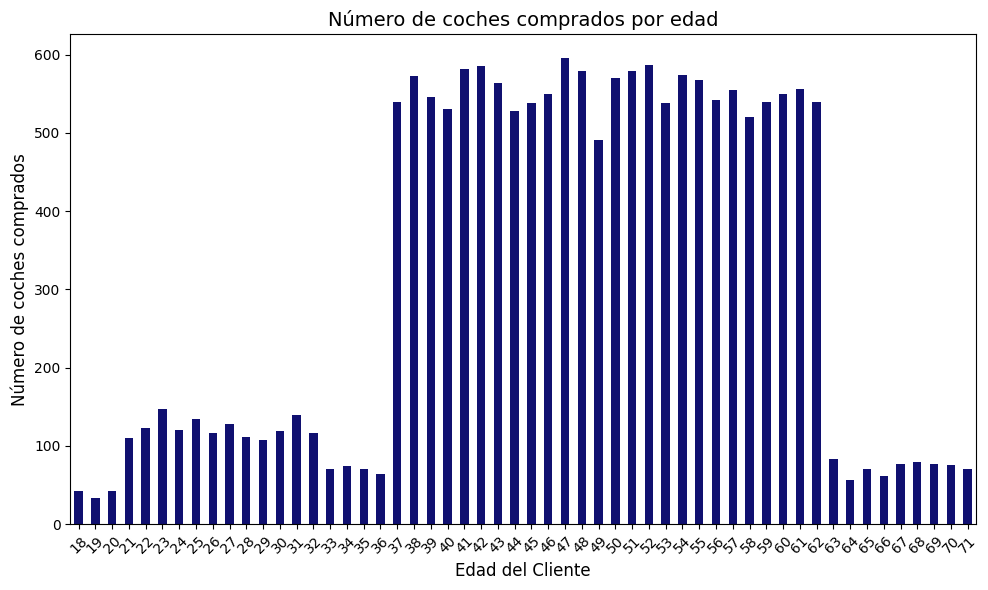

In [25]:
# Si 'Mas_1_coche' es un booleano, puedes convertirlo a un valor entero (1 o 0)
data['Mas_1_coche'] = data['Mas_1_coche'].astype(int)

# Agrupar por edad y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_edad = data.groupby('Edad_Cliente')['Mas_1_coche'].sum()

# Graficar la comparación
plt.figure(figsize=(10, 6))
compras_por_edad.plot(kind='bar', color='#101070')  # Usando tu color preferido (Dark Blue)

plt.title('Número de coches comprados por edad', fontsize=14)
plt.xlabel('Edad del Cliente', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

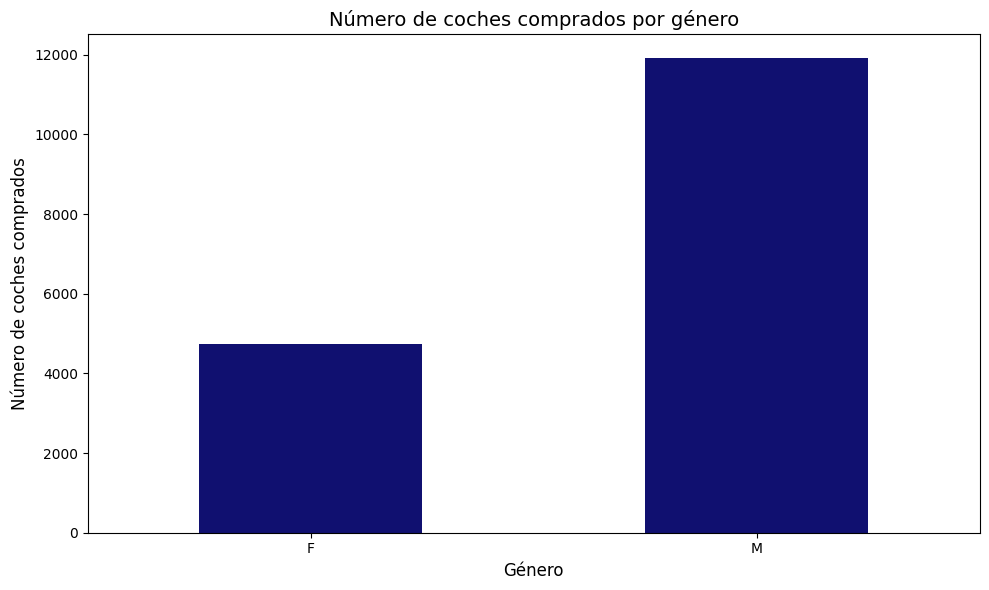

In [26]:
# Agrupar por género y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_genero = data.groupby('GENERO')['Mas_1_coche'].sum()

# Graficar la comparación por género
plt.figure(figsize=(10, 6))
compras_por_genero.plot(kind='bar', color='#101070')

plt.title('Número de coches comprados por género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


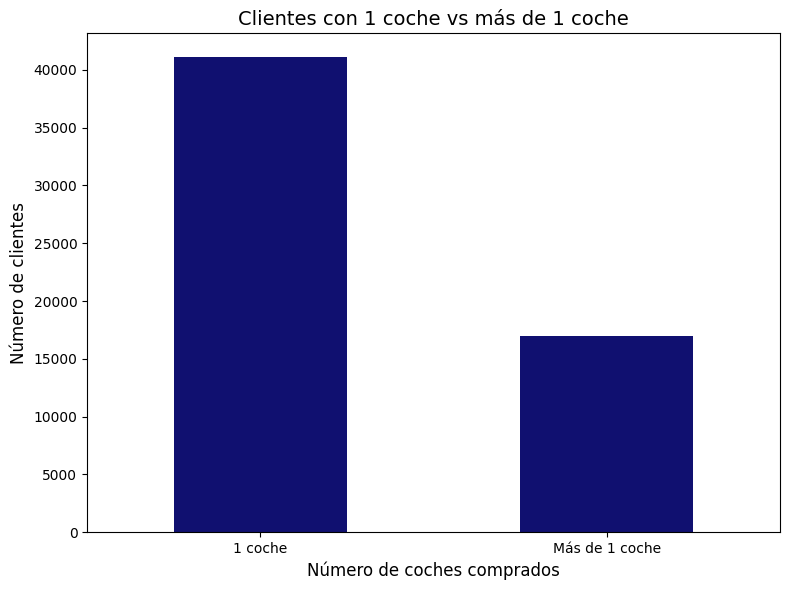

In [27]:
# Agrupar por la categoría de coches comprados (1 o más) y contar el número de clientes en cada categoría
compras_1_vs_mas1 = data.groupby('Mas_1_coche').size()

# Graficar la comparación de clientes con 1 coche o más
plt.figure(figsize=(8, 6))
compras_1_vs_mas1.plot(kind='bar', color='#101070')

plt.title('Clientes con 1 coche vs más de 1 coche', fontsize=14)
plt.xlabel('Número de coches comprados', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['1 coche', 'Más de 1 coche'], rotation=0)
plt.tight_layout()

plt.show()


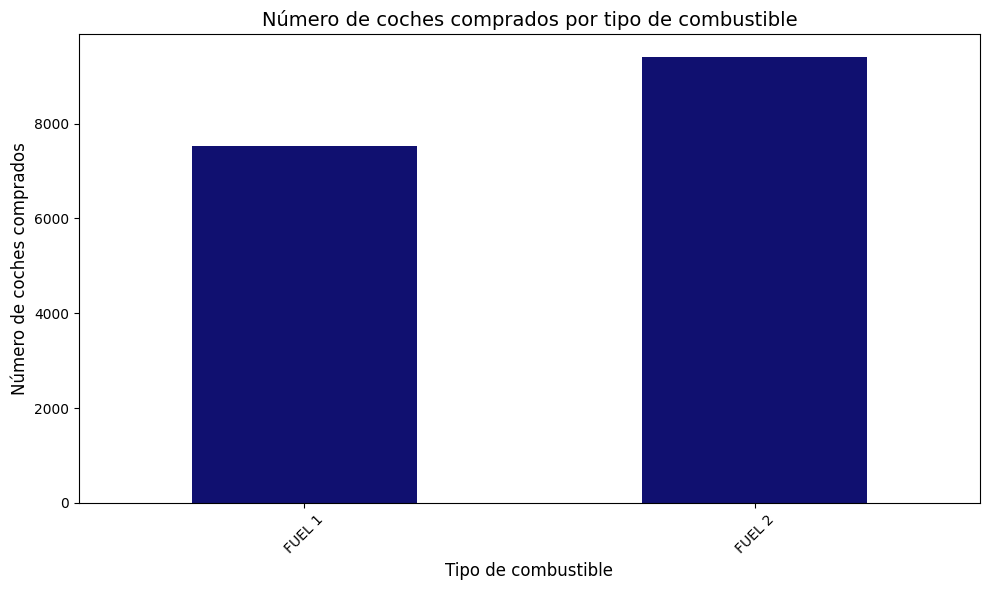

In [28]:
# Agrupar por tipo de combustible y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_combustible = data.groupby('COMBUSTIBLE')['Mas_1_coche'].sum()

# Graficar la comparación por tipo de combustible
plt.figure(figsize=(10, 6))
compras_por_combustible.plot(kind='bar', color='#101070')

plt.title('Número de coches comprados por tipo de combustible', fontsize=14)
plt.xlabel('Tipo de combustible', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Label Encoding (Para columnas ordinales)
-> random 

In [ ]:
# Lista de columnas ordinales para Label Encoding
label_columns = ['PRODUCTO', 'TIPO_CARROCERIA', 'FORMA_PAGOFORMA_PAGO', 'ESTADO_CIVIL', 'OcupaciOn', 'PROVINCIA', 'Zona_Renta', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo']  

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar Label Encoding a las columnas ordinales
for col in label_columns:
    data[col + '_encoded'] = le.fit_transform(data[col])

# Mostrar el DataFrame con las columnas codificadas
print(data.head())

### One-Hot Encoding (Para columnas nominales)
->1/0

In [ ]:
# Lista de columnas nominales para One-Hot Encoding
one_hot_columns = ['COMBUSTIBLE', 'GENERO', 'TRANS', 'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 'QUEJA_CAC', 'Mas_1_coche']  

# Aplicar One-Hot Encoding a las columnas nominales
data_encoded = pd.get_dummies(data, columns=one_hot_columns)

# Mostrar el DataFrame con las columnas codificadas
print(data_encoded.head())

### Ordinal Encoding (Para columnas con un orden específico)
-> orden

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Lista de columnas para Ordinal Encoding junto con sus categorías ordenadas
ordinal_columns = {
    'Potencia': ['Baja', 'Media', 'Alta'],   
    'Averia_grave': ['No', 'Averia leve', 'Averia grave', 'Averia muy grave']  
}

# Crear un objeto OrdinalEncoder
ord_enc = OrdinalEncoder()

# Aplicar Ordinal Encoding a las columnas con un orden específico
for col, categories in ordinal_columns.items():
    ord_enc.categories = [categories]  # Especificar el orden de las categorías
    data[col + '_encoded'] = ord_enc.fit_transform(data[[col]])

# Mostrar el DataFrame con las columnas codificadas
print(data.head())
